In [438]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']

#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
3,44,14,790.0,20792.0
2,49,14,8011.0,25912.0
6,52,12,887.0,12221.0
14,53,2,91.0,29431.0
15,57,2,99.0,21863.0
11,59,5,183.0,17193.0
12,62,4,136.0,11766.0
0,63,29,1866.0,18477.0
7,72,6,331.0,21345.0
16,78,2,26.0,20128.0


In [439]:
data2['user'].max()

'spinglebob'

In [440]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
76,76,0.0,0.0,0.0
77,77,0.0,0.0,0.0
78,78,2.0,26.0,20128.0
79,79,0.0,0.0,0.0
80,80,0.0,0.0,0.0


In [441]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,81.000000,81.000000,81.000000,81.000000
mean,40.000000,1.950617,326.456790,4189.592593
std,23.526581,5.137853,1508.444448,8461.572318
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,0.000000
max,80.000000,29.000000,10875.000000,29431.000000


In [442]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,6.0,134.0,17697.0,0.037222,4.915833
1,1,0.0,0.0,0.0,0.000000,0.000000
2,2,0.0,0.0,0.0,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000000,0.000000


In [443]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,6.0,134.0,17697.0,0.037222,4.915833,0.757190
1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,5,23.0,1561.0,20382.0,0.433611,5.661667,7.658718
6,6,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,7,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,8,6.0,396.0,18686.0,0.110000,5.190556,2.119234
9,9,6.0,412.0,16418.0,0.114444,4.560556,2.509441


In [444]:
stream_stats['persenteg'].describe()

count    81.000000
mean      1.445307
std       6.037295
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      43.240557
Name: persenteg, dtype: float64

In [445]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
40,40,0.0,0.0,0.0,0.0,0.0,0.0
38,38,0.0,0.0,0.0,0.0,0.0,0.0
39,39,0.0,0.0,0.0,0.0,0.0,0.0
79,79,0.0,0.0,0.0,0.0,0.0,0.0
41,41,0.0,0.0,0.0,0.0,0.0,0.0
42,42,0.0,0.0,0.0,0.0,0.0,0.0
43,43,0.0,0.0,0.0,0.0,0.0,0.0
45,45,0.0,0.0,0.0,0.0,0.0,0.0
46,46,0.0,0.0,0.0,0.0,0.0,0.0
47,47,0.0,0.0,0.0,0.0,0.0,0.0


In [446]:
stream_stats['watch_length_in_hour'].sum() /24

0.30605324074074075

In [447]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
40,40,0.0,0.0,0.0,0.0,0.0,0.0
38,38,0.0,0.0,0.0,0.0,0.0,0.0
39,39,0.0,0.0,0.0,0.0,0.0,0.0
79,79,0.0,0.0,0.0,0.0,0.0,0.0
41,41,0.0,0.0,0.0,0.0,0.0,0.0
42,42,0.0,0.0,0.0,0.0,0.0,0.0
43,43,0.0,0.0,0.0,0.0,0.0,0.0
45,45,0.0,0.0,0.0,0.0,0.0,0.0
46,46,0.0,0.0,0.0,0.0,0.0,0.0
47,47,0.0,0.0,0.0,0.0,0.0,0.0


In [448]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
72,72,6.0,331.0,21345.0,0.091944,5.929167,1.550714
8,8,6.0,396.0,18686.0,0.110000,5.190556,2.119234
9,9,6.0,412.0,16418.0,0.114444,4.560556,2.509441
44,44,14.0,790.0,20792.0,0.219444,5.775556,3.799538
18,18,12.0,606.0,15531.0,0.168333,4.314167,3.901874
52,52,12.0,887.0,12221.0,0.246389,3.394722,7.257999
5,5,23.0,1561.0,20382.0,0.433611,5.661667,7.658718
63,63,29.0,1866.0,18477.0,0.518333,5.132500,10.099042
49,49,14.0,8011.0,25912.0,2.225278,7.197778,30.916178
36,36,13.0,10875.0,25150.0,3.020833,6.986111,43.240557


In [449]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
71,71,0.0,0.0,0.0,0.000000,0.000000,0.000000
72,72,6.0,331.0,21345.0,0.091944,5.929167,1.550714
73,73,0.0,0.0,0.0,0.000000,0.000000,0.000000
74,74,0.0,0.0,0.0,0.000000,0.000000,0.000000
75,75,0.0,0.0,0.0,0.000000,0.000000,0.000000
76,76,0.0,0.0,0.0,0.000000,0.000000,0.000000
77,77,0.0,0.0,0.0,0.000000,0.000000,0.000000
78,78,2.0,26.0,20128.0,0.007222,5.591111,0.129173
79,79,0.0,0.0,0.0,0.000000,0.000000,0.000000
80,80,0.0,0.0,0.0,0.000000,0.000000,0.000000


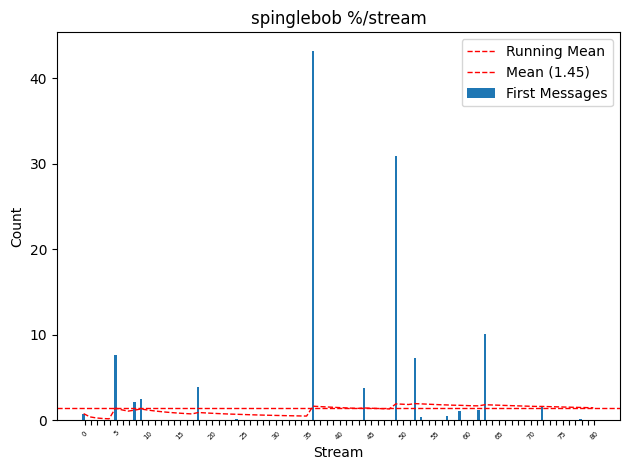

In [450]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()